In [96]:
import pandas as pd

In [97]:
df = pd.read_csv("high_diamond_ranked_10min.csv")

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

#importing most of what i need to do this project

In [99]:
df.head(10)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
5,4475365709,1,18,0,0,5,3,6,1,1,...,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,4493010632,1,18,3,1,7,6,7,1,1,...,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
7,4496759358,0,16,2,0,5,13,3,0,0,...,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0
8,4443048030,0,16,3,0,7,7,8,0,0,...,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0
9,4509433346,1,13,1,1,4,5,5,1,1,...,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [101]:
df.shape

(9879, 40)

In [102]:
df.isnull().sum()
#looking to see if my dataset is dirty

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [103]:
df['blueWins'].value_counts(normalize=True)

0    0.500962
1    0.499038
Name: blueWins, dtype: float64

In [104]:
df.drop('gameId',axis=1)
#the only column that seems useless so no need to keep it in

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,1,0,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,1,54,0,0,6,4,8,1,1,0,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,0,23,1,0,6,7,5,0,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,0,14,4,1,2,3,3,1,1,0,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [105]:
y_true = df['blueWins']

In [106]:
train = df
test = df.drop('blueWins',axis=1)

In [107]:
train, val = train_test_split(train, train_size=0.80, test_size=0.20, stratify=df['blueWins'], random_state=42)

In [108]:
target = 'blueWins'
#setting my target to the binary classification if blue team will win

In [109]:
train_features = train.drop(columns=[target])
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
features = numeric_features

In [110]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [111]:
%%time
pipeline = make_pipeline(
    SelectKBest(),
    RandomForestClassifier(
        n_jobs=1,
        random_state=42,
        n_estimators=9,
    )
)

param_distributions = {
    'randomforestclassifier__criterion': ('gini', 'entropy'),
    'randomforestclassifier__max_depth': (14,15,16,20,25),
    'randomforestclassifier__max_features': (9,12,13,14,15,16),
    'randomforestclassifier__min_samples_split': (2,4,6,8,10)
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=150,
    cv=5,
    scoring='accuracy',
    verbose=1,
    return_train_score=True,
    n_jobs=-1,
)

search.fit(X_train,y_train)

print('Best Score:',search.best_score_)
print('Best param:',search.best_params_)
print('Best estimaator:', search.best_estimator_)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 727 out of 750 | elapsed:   12.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:   13.1s finished
Best Score: 0.7054280658772287
Best param: {'randomforestclassifier__min_samples_split': 6, 'randomforestclassifier__max_features': 9, 'randomforestclassifier__max_depth': 14, 'randomforestclassifier__criterion': 'gini'}
Best estimaator: Pipeline(memory=None,
         steps=[('selectkbest',
                 SelectKBest(k=10,
                             score_func=<function f_classif at 0x00000115D09DAA68>)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None

In [132]:
%%time
pipe = make_pipeline(
    SelectKBest(k=20),
    RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=15, max_features=9,
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=42,
                                        verbose=0, warm_start=False)
)
pipe.fit(X_train,y_train)

Wall time: 781 ms


Pipeline(memory=None,
         steps=[('selectkbest',
                 SelectKBest(k=20,
                             score_func=<function f_classif at 0x00000115D09DAA68>)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=15, max_features=9,
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=42,
                                        verbose=0, warm_

In [133]:
print('training accuracy:', pipe.score(X_train, y_train))
print('validation accuracy:', pipe.score(X_val, y_val))

training accuracy: 0.959762115652284
validation accuracy: 0.7191295546558705


In [134]:
y_pred = pipe.predict(X_test)

In [135]:
print('Accuracy Score:',accuracy_score(y_true, y_pred))

Accuracy Score: 0.911630731855451


In [136]:
model = make_pipeline(
    SelectKBest(k=20),
    LogisticRegression(random_state=42)
)
model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('selectkbest',
                 SelectKBest(k=20,
                             score_func=<function f_classif at 0x00000115D09DAA68>)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [137]:
print('training accuracy:', model.score(X_train, y_train))
print('validation accuracy:', model.score(X_val, y_val))

training accuracy: 0.7292167531317222
validation accuracy: 0.7165991902834008


In [138]:
y_pred = model.predict(X_test)

In [139]:
print('Accuracy Score:',accuracy_score(y_true, y_pred))

Accuracy Score: 0.7266929851199514


In [140]:
from xgboost.sklearn import XGBClassifier
model2 = make_pipeline(
    SelectKBest(k=20),
    XGBClassifier(
    n_estimators=20,
    max_depth=12,
    learning_rate=.5,
    n_jobs=-1
    )
) 

model2.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('selectkbest',
                 SelectKBest(k=20,
                             score_func=<function f_classif at 0x00000115D09DAA68>)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.5,
                               max_delta_step=0, max_depth=12,
                               min_child_weight=1, missing=None,
                               n_estimators=20, n_jobs=-1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)

In [141]:
print('training accuracy:', model2.score(X_train, y_train))
print('validation accuracy:', model2.score(X_val, y_val))

training accuracy: 0.9930406174870302
validation accuracy: 0.7004048582995951


In [142]:
y_pred = model2.predict(X_test)

In [143]:
print('Accuracy Score:',accuracy_score(y_true, y_pred))

Accuracy Score: 0.9345075412491143


In [124]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    pipe,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val, y_val)

PermutationImportance(cv='prefit',
                      estimator=Pipeline(memory=None,
                                         steps=[('selectkbest',
                                                 SelectKBest(k=20,
                                                             score_func=<function f_classif at 0x00000115D09DAA68>)),
                                                ('randomforestclassifier',
                                                 RandomForestClassifier(bootstrap=True,
                                                                        ccp_alpha=0.0,
                                                                        class_weight=None,
                                                                        criterion='entropy',
                                                                        max_depth=15,
                                                                        max_features=9,
                                                      

In [126]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=X_val.columns.tolist()
)

Weight,Feature
0.0179 ± 0.0072,redGoldDiff
0.0134 ± 0.0072,blueGoldDiff
0.0104 ± 0.0041,redEliteMonsters
0.0050 ± 0.0092,blueExperienceDiff
0.0049 ± 0.0085,redTotalExperience
0.0048 ± 0.0028,blueAssists
0.0037 ± 0.0024,blueKills
0.0024 ± 0.0036,redAvgLevel
0.0022 ± 0.0030,blueAvgLevel
0.0018 ± 0.0053,redGoldPerMin


In [127]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['blueGoldDiff', 'blueExperienceDiff']

interaction = pdp_interact(
    model=pipe,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x115d1ea80c8>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x115d1ec11c8>})

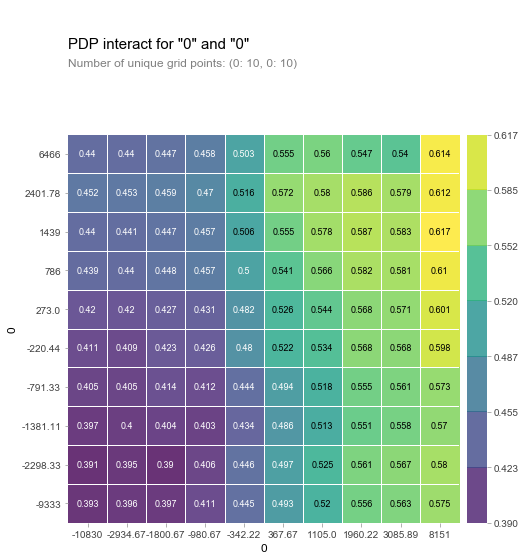

In [128]:
pdp_interact_plot(interaction, plot_type='grid', feature_names=feature)